<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import requests

# Download the dataset
url = 'https://github.com/hellbuoy/car-price-prediction/raw/master/CarPrice_Assignment.csv'
response = requests.get(url)
if response.status_code == 200:
    with open('CarPrice_Assignment.csv', 'wb') as file:
        file.write(response.content)
    print("Dataset downloaded successfully.")
else:
    print(f"Failed to download dataset. Status code: {response.status_code}")

# Load the CSV file into a DataFrame
try:
    file_path = 'CarPrice_Assignment.csv'
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the download process.")
except pd.errors.EmptyDataError:
    print("File is empty.")
except pd.errors.ParserError:
    print("Error parsing the file.")

# Display basic information about the dataset
print("\nDataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nSummary Statistics:\n", df.describe())

# Check for missing values
print("\nMissing Values in Each Column:\n", df.isnull().sum())

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Check data types of each column
print("\nData Types of Columns:\n", df.dtypes)

# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':", df[col].unique())


Failed to download dataset. Status code: 404
Error parsing the file.

Dataset Head:
      car_ID  symboling   CarName  fueltype  aspiration  doornumber   carbody  \
0 -1.723622   1.743470 -1.838221  0.328798   -0.469295    1.130388 -3.050975   
1 -1.706724   1.743470 -1.813780  0.328798   -0.469295    1.130388 -3.050975   
2 -1.689826   0.133509 -1.862662  0.328798   -0.469295    1.130388 -0.717207   
3 -1.672928   0.938490 -1.789339  0.328798   -0.469295   -0.884652  0.449677   
4 -1.656029   0.938490 -1.764897  0.328798   -0.469295   -0.884652  0.449677   

   drivewheel  enginelocation  wheelbase  ...  fuelsystem  boreratio  \
0    1.213330       -0.121867  -1.690772  ...    0.869568   0.519071   
1    1.213330       -0.121867  -1.690772  ...    0.869568   0.519071   
2    1.213330       -0.121867  -0.708596  ...    0.869568  -2.404880   
3   -0.589081       -0.121867   0.173698  ...    0.869568  -0.517266   
4   -2.391492       -0.121867   0.107110  ...    0.869568  -0.517266   

 

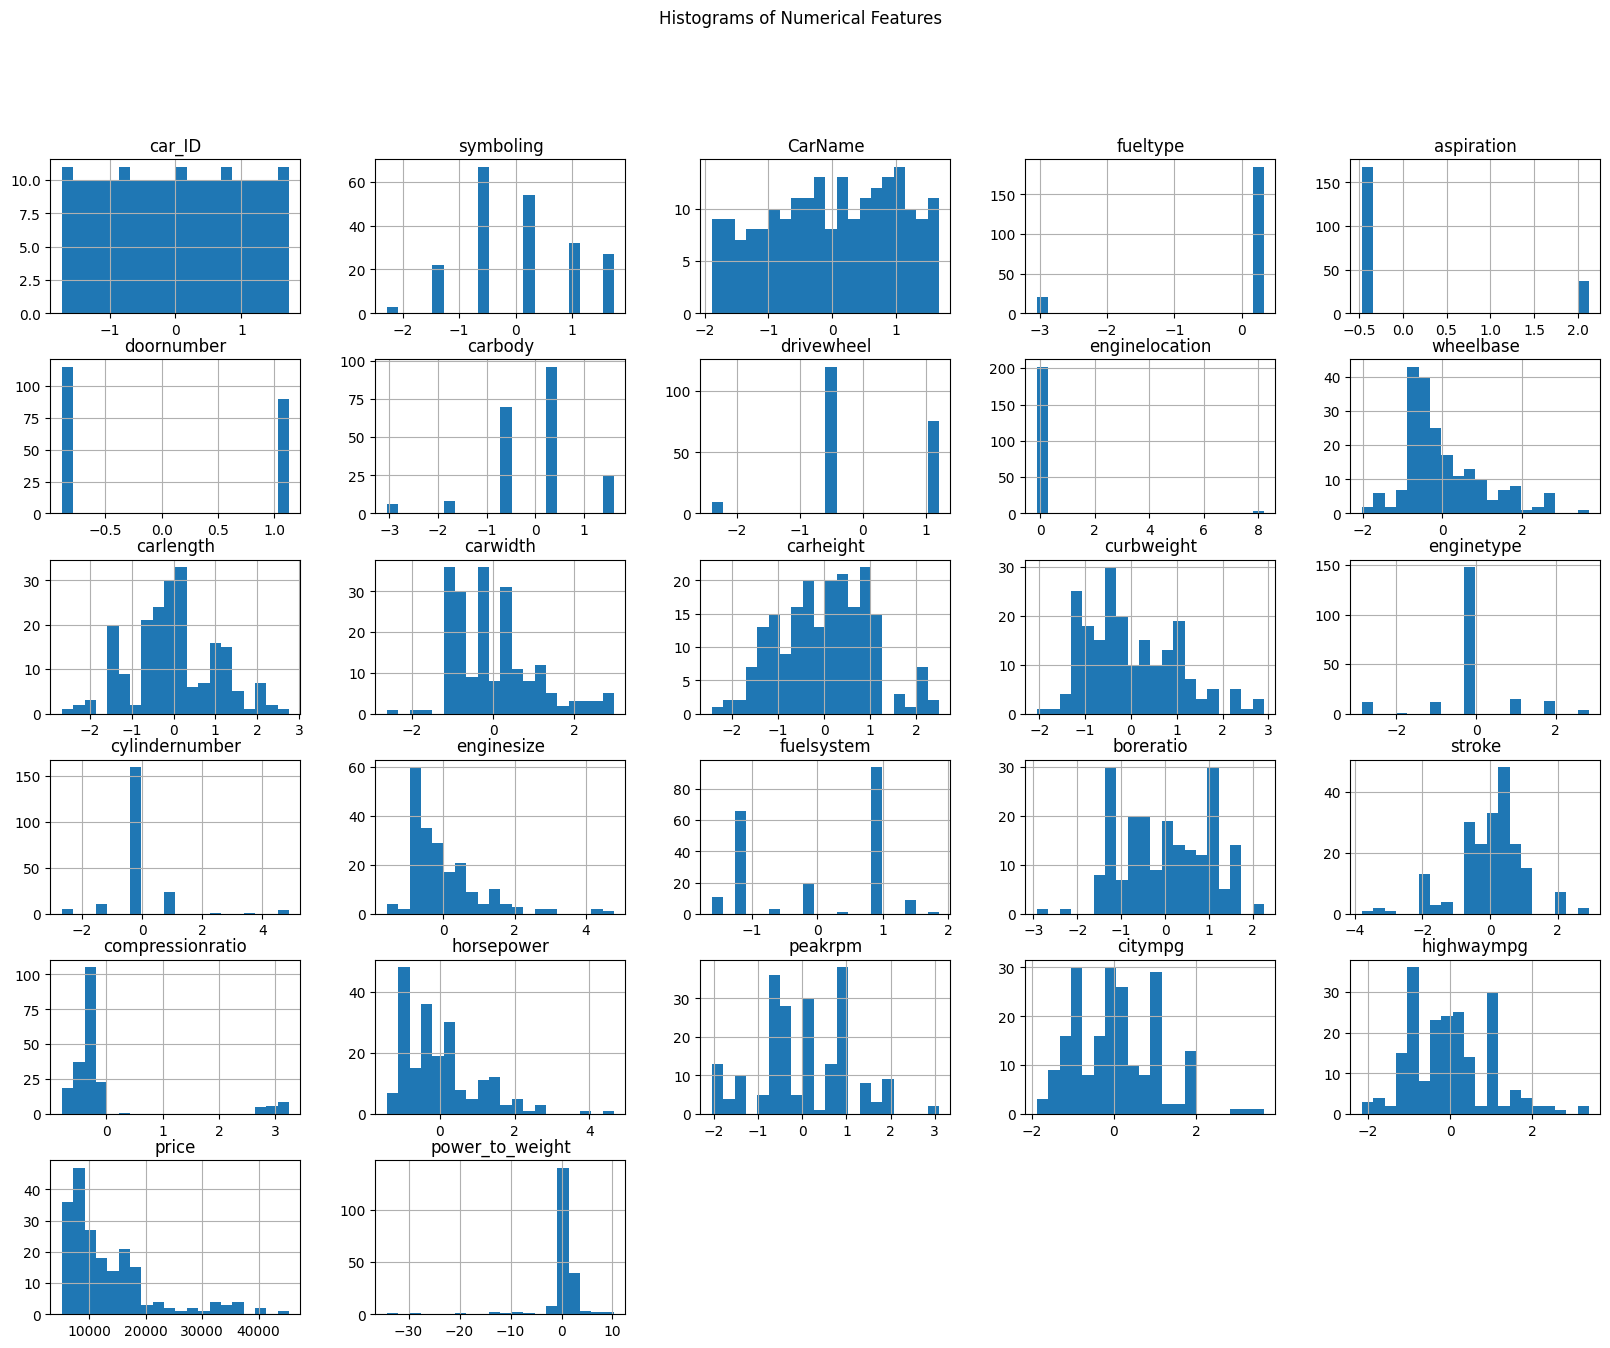

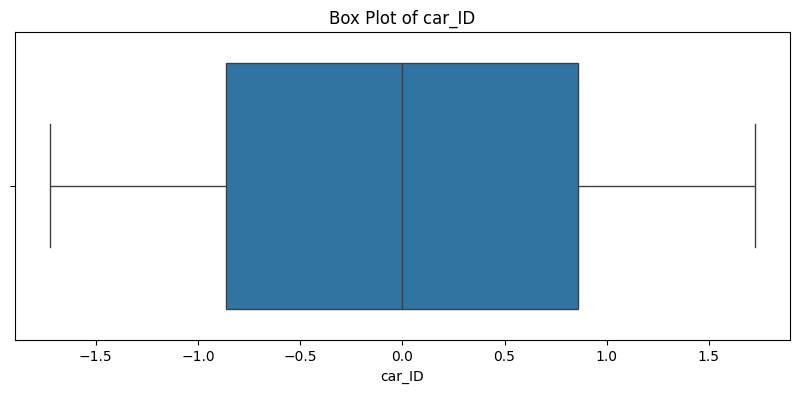

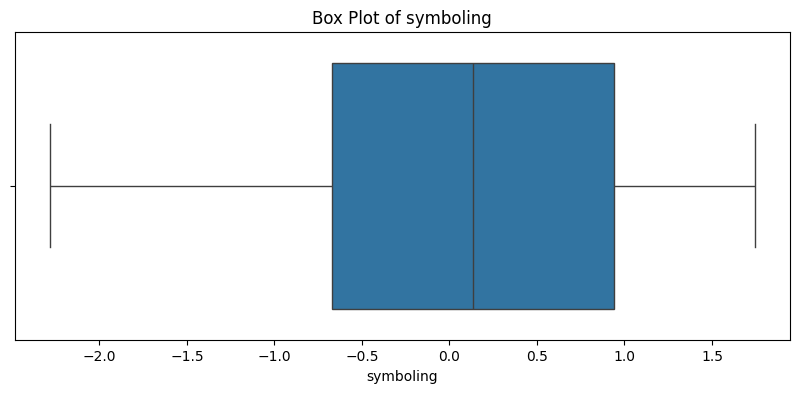

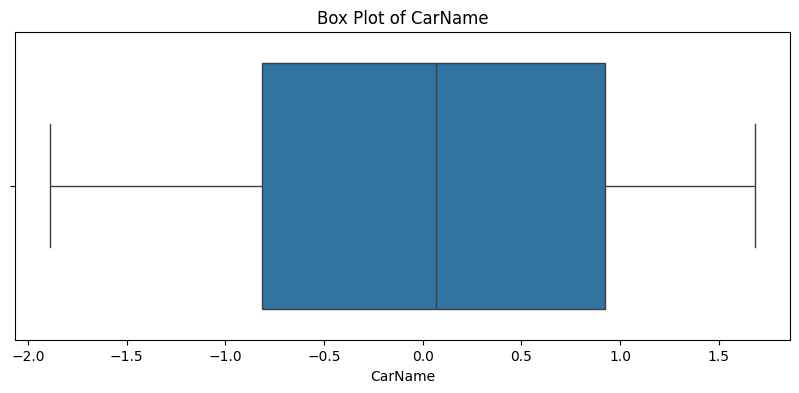

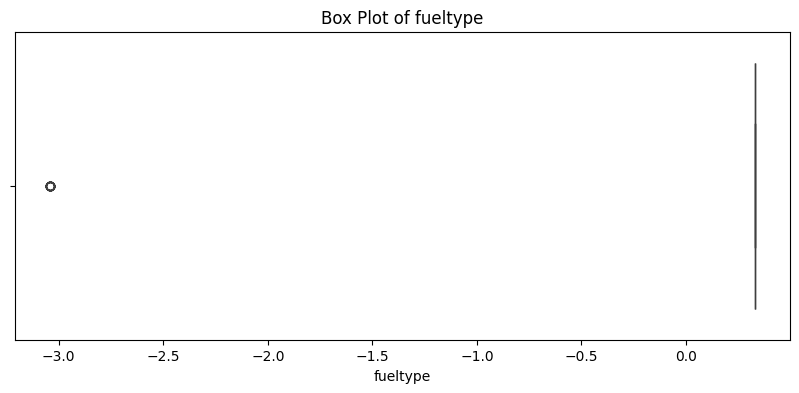

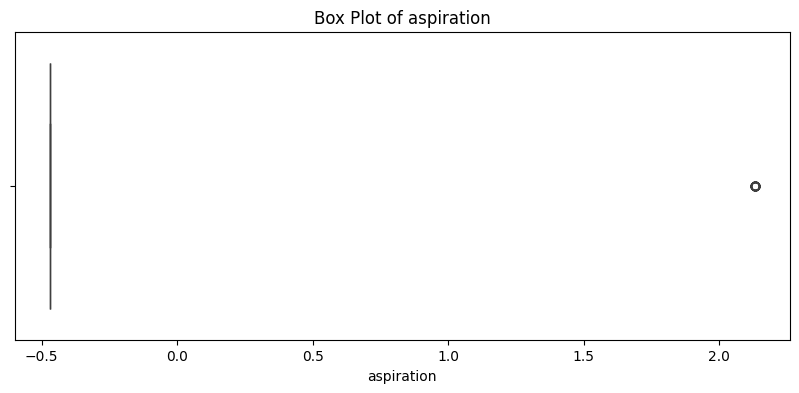

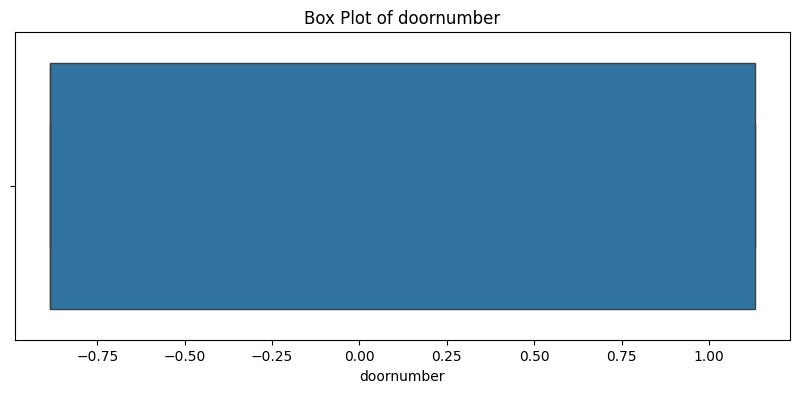

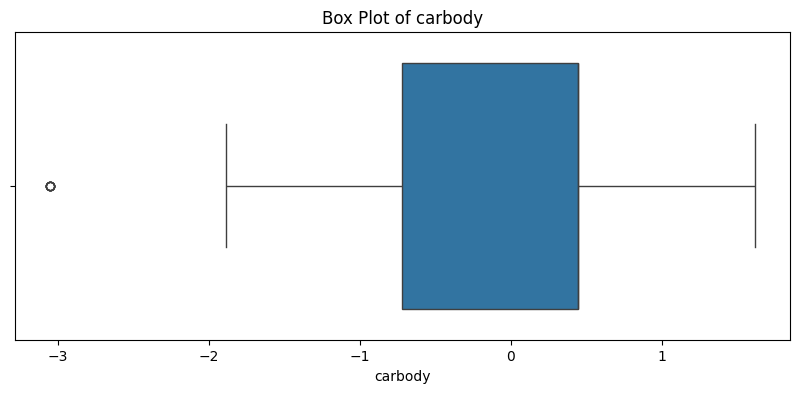

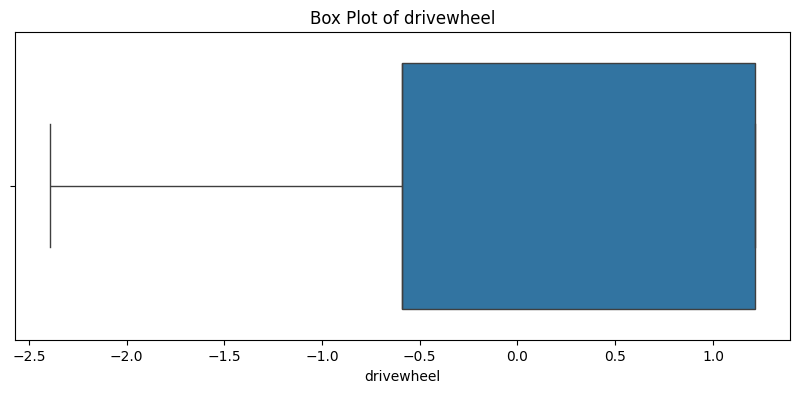

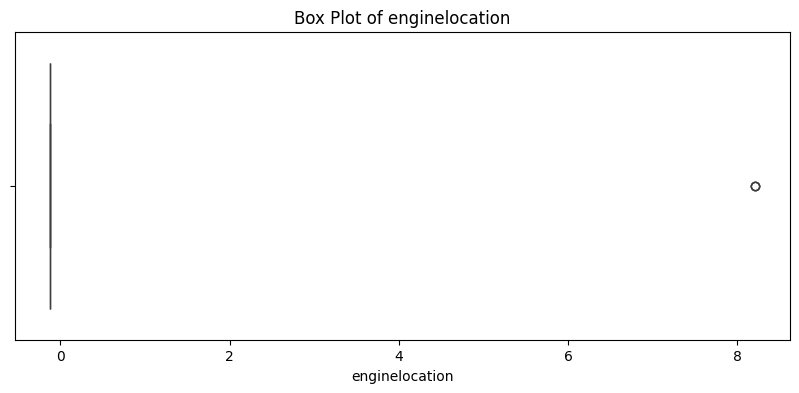

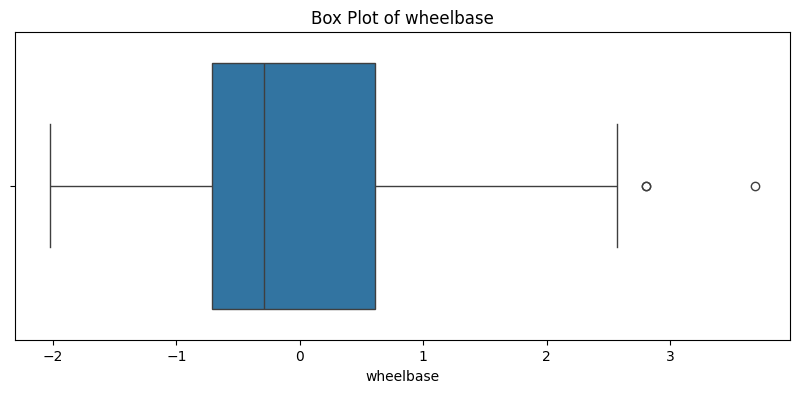

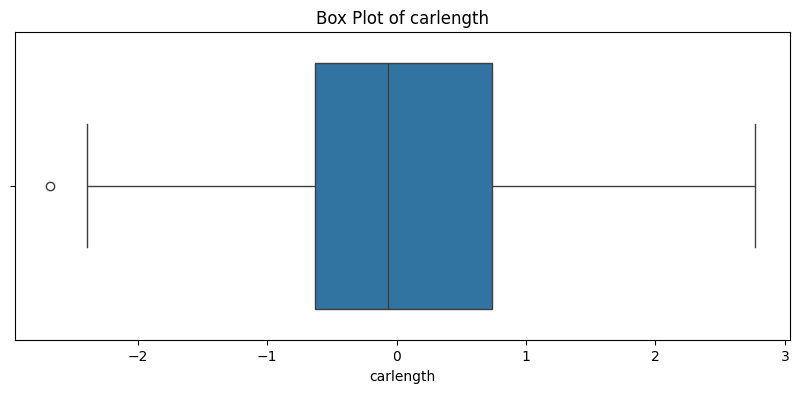

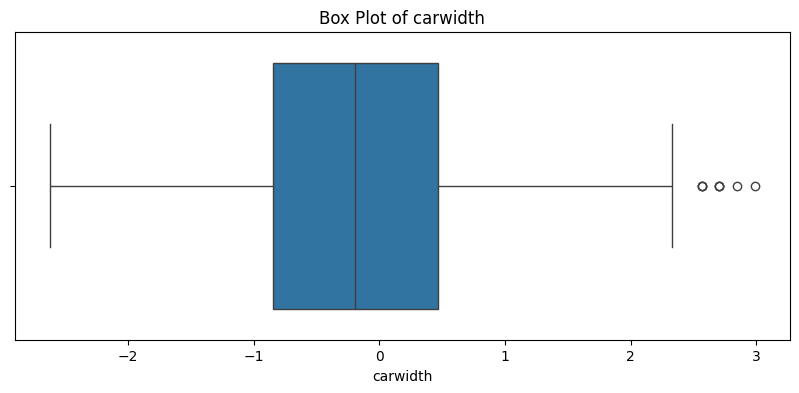

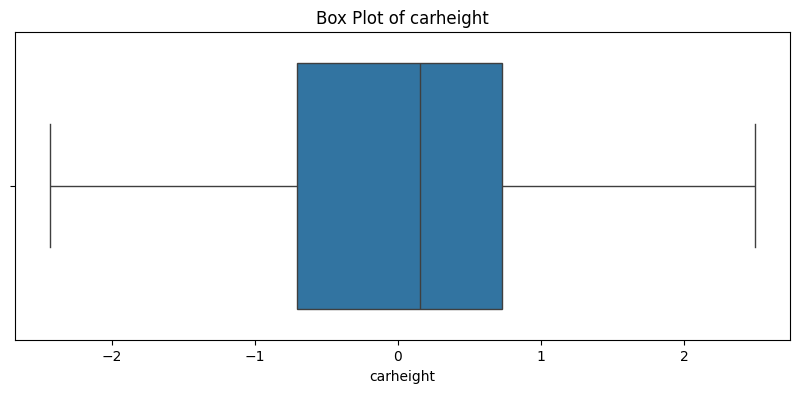

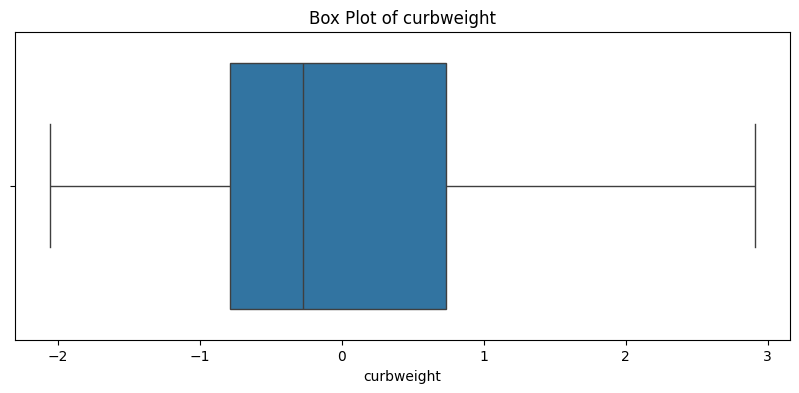

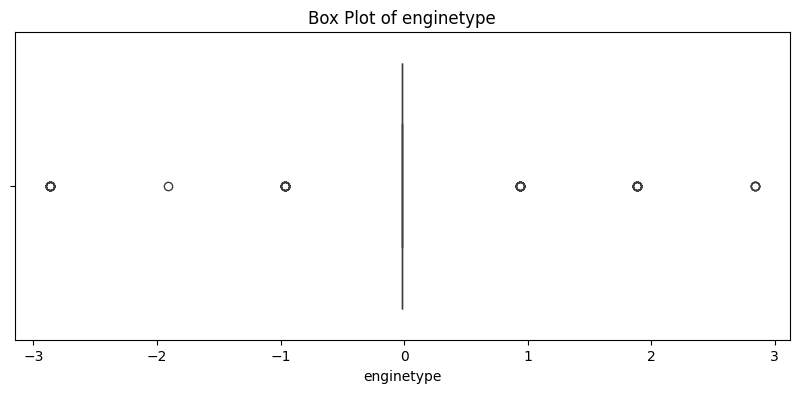

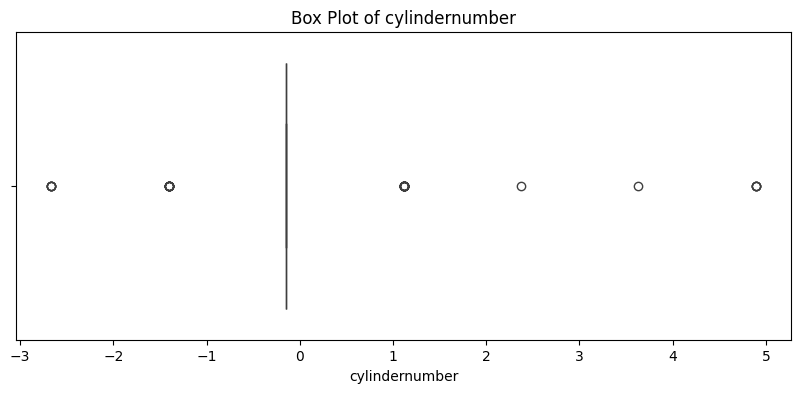

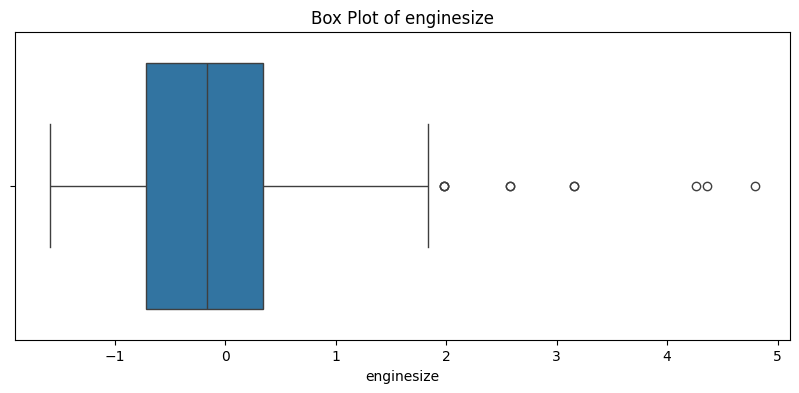

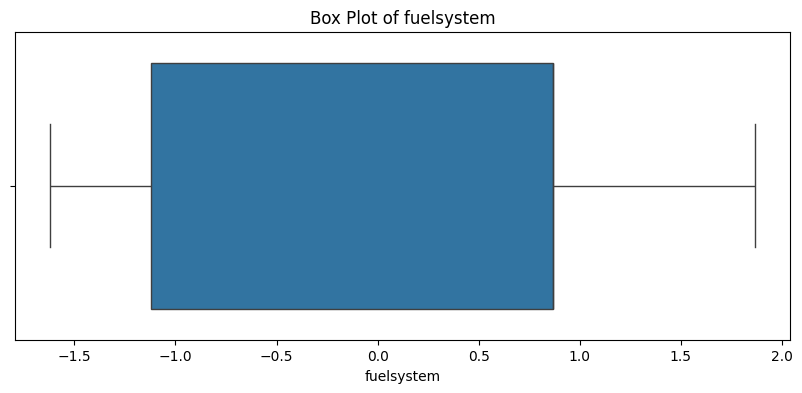

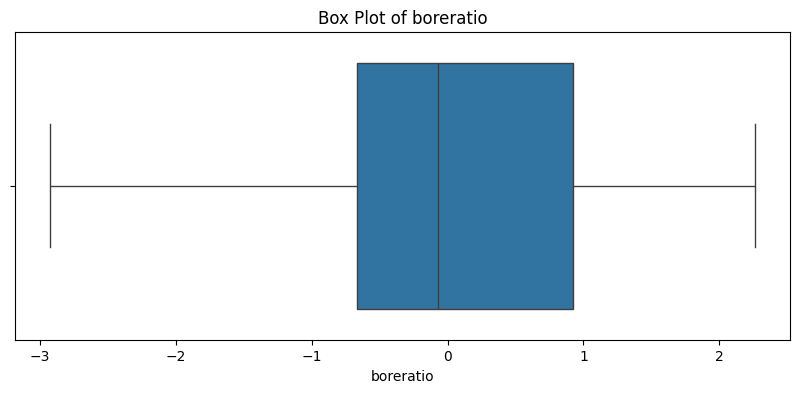

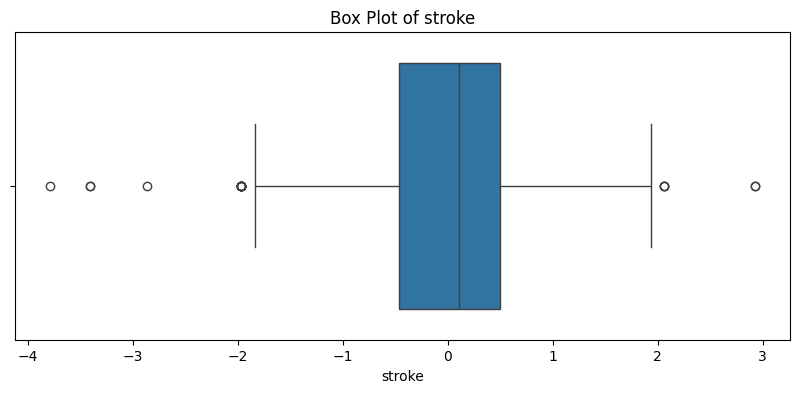

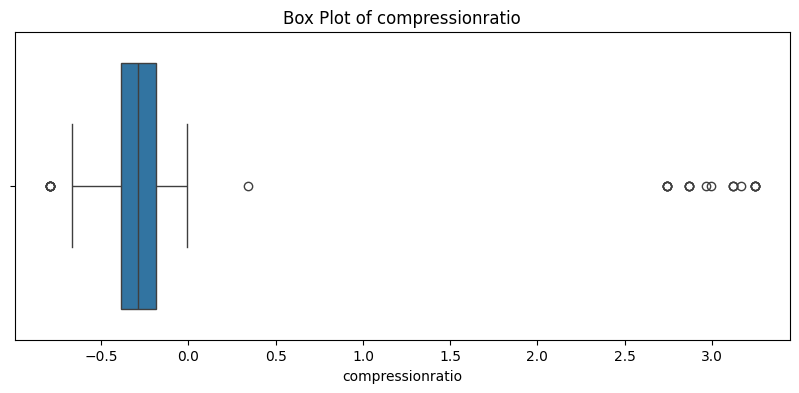

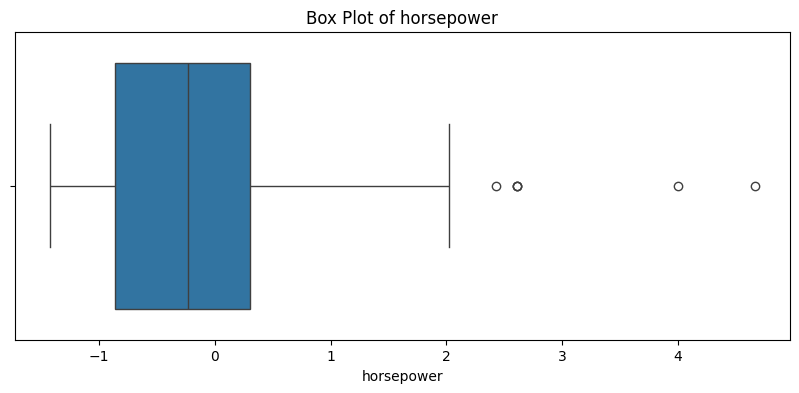

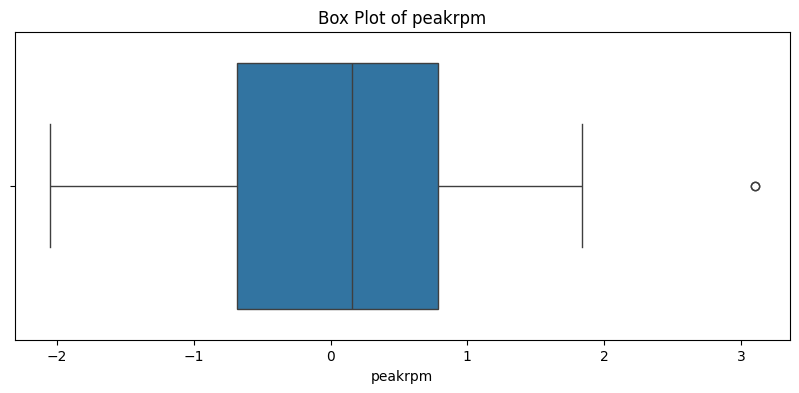

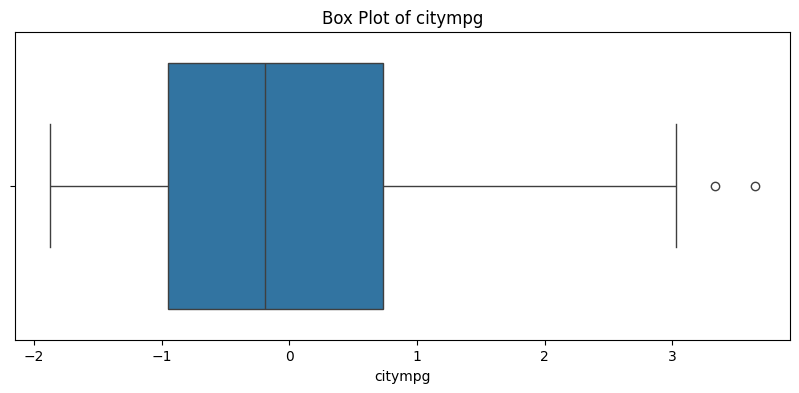

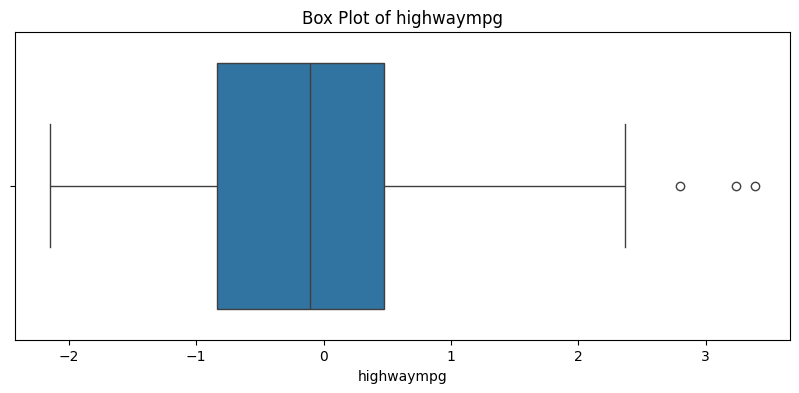

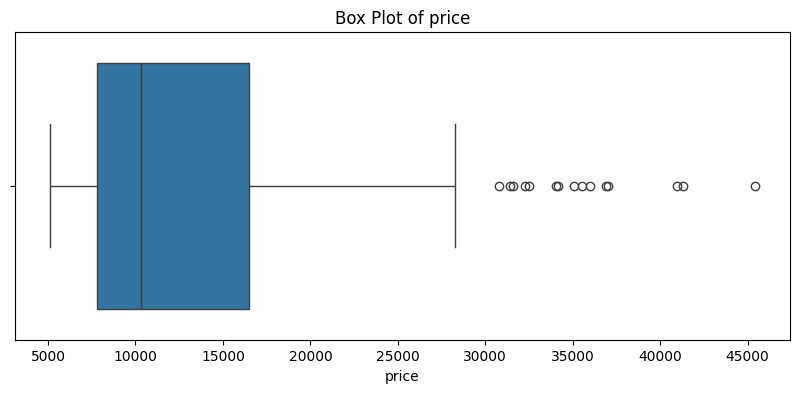

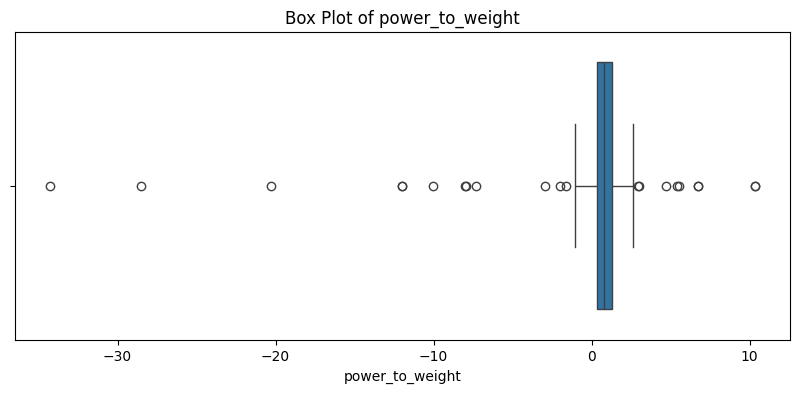

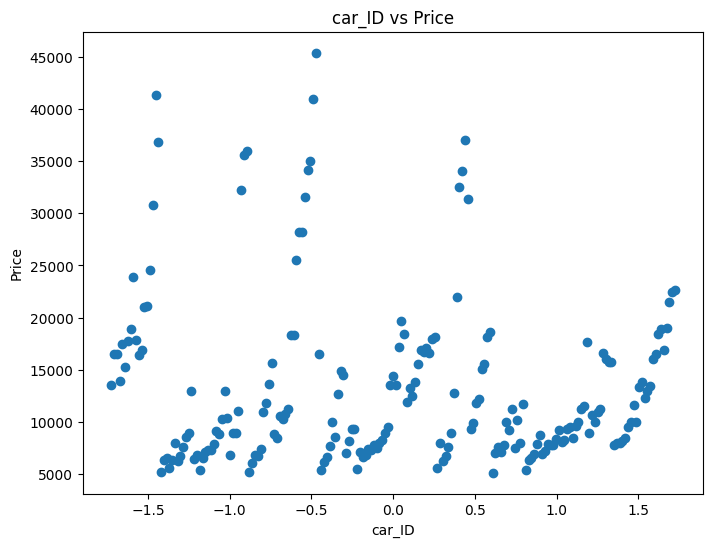

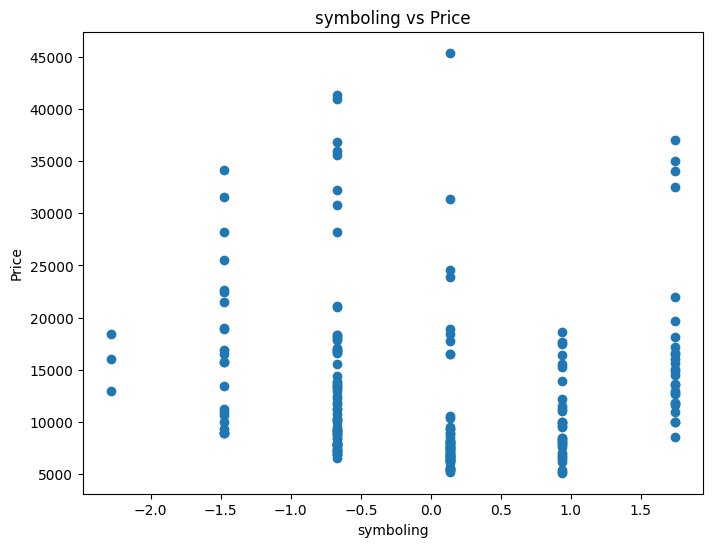

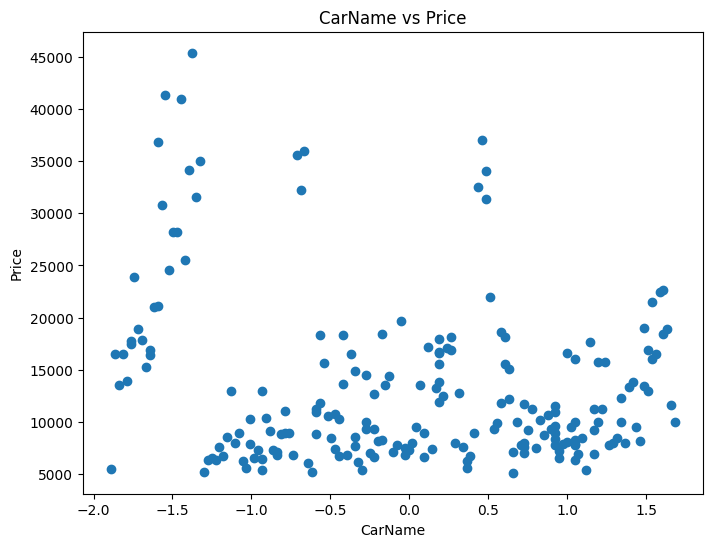

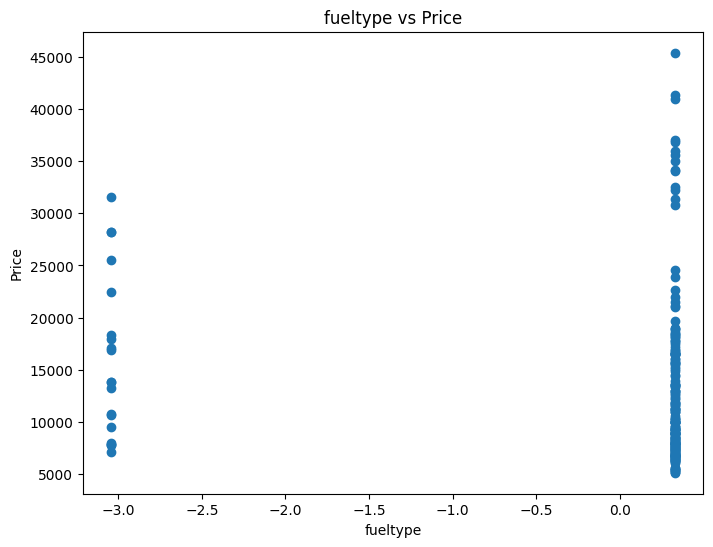

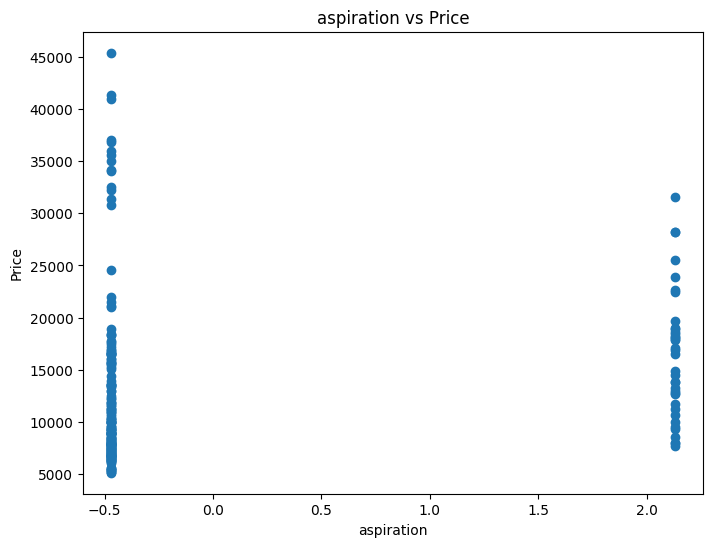

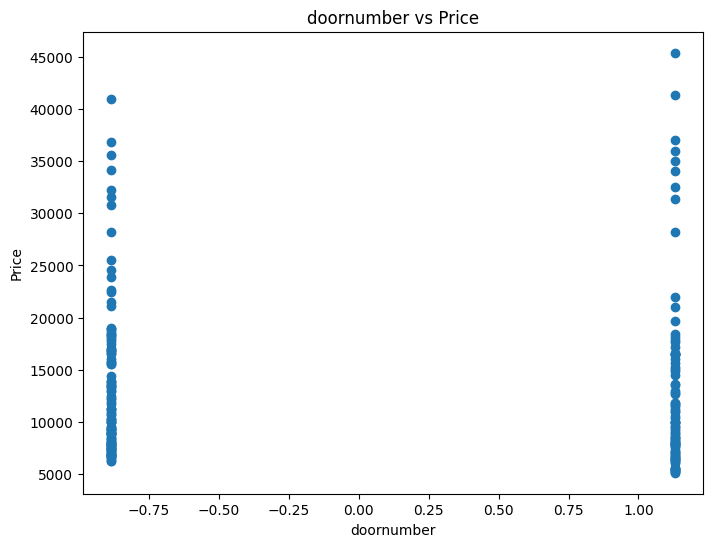

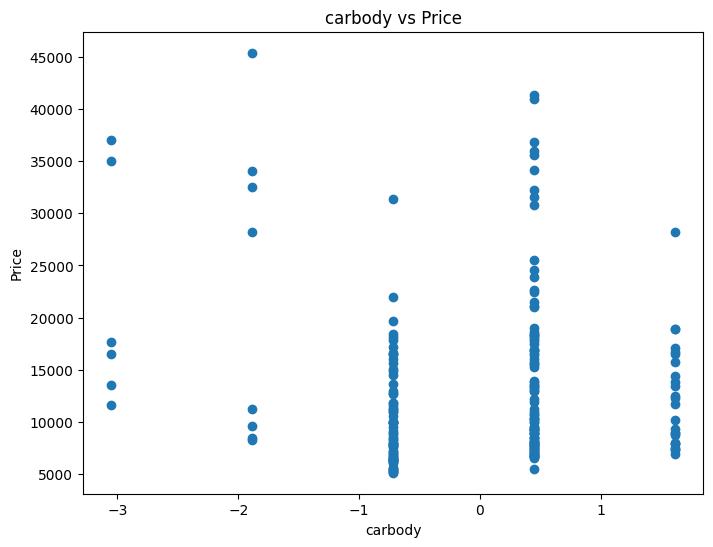

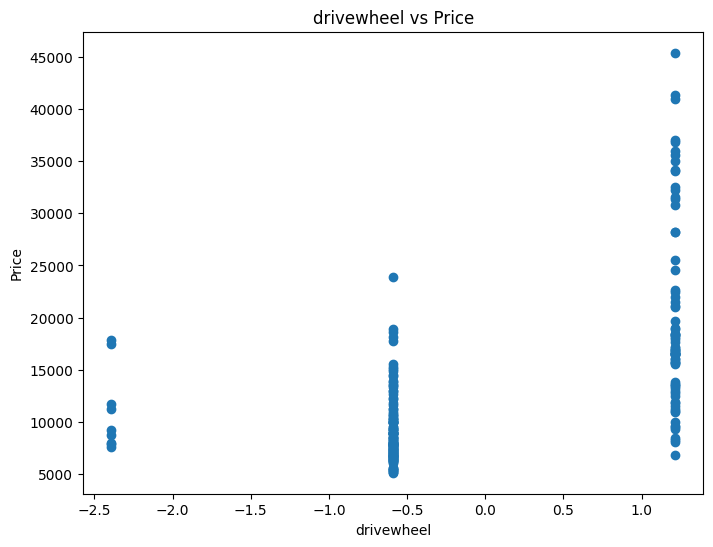

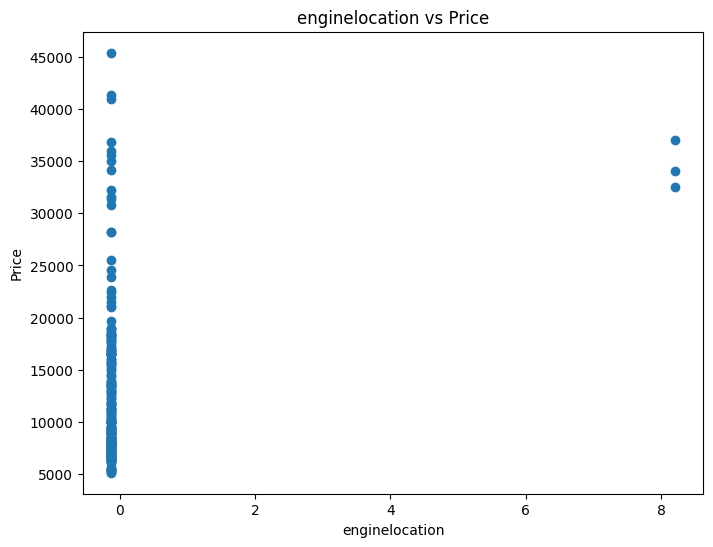

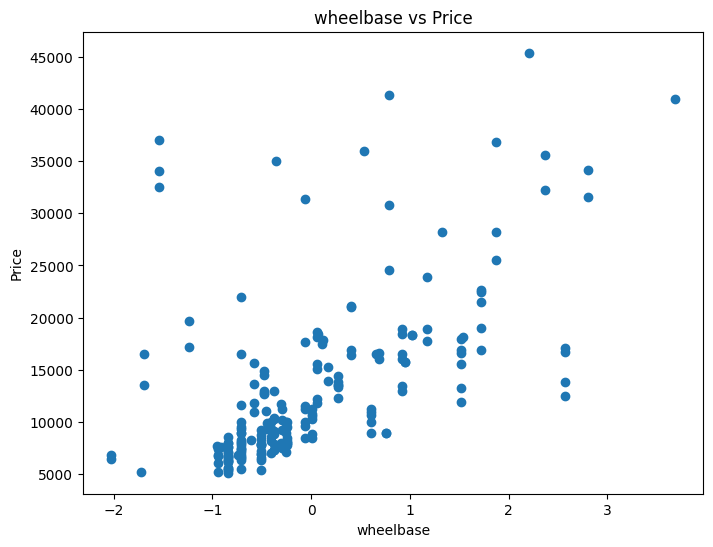

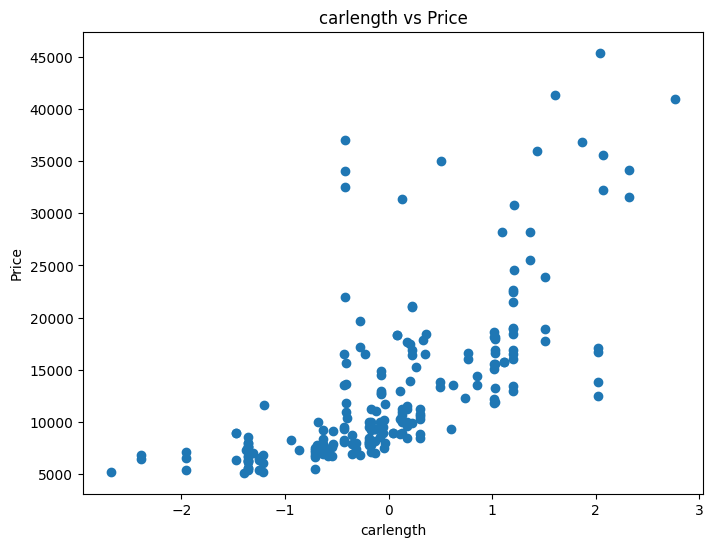

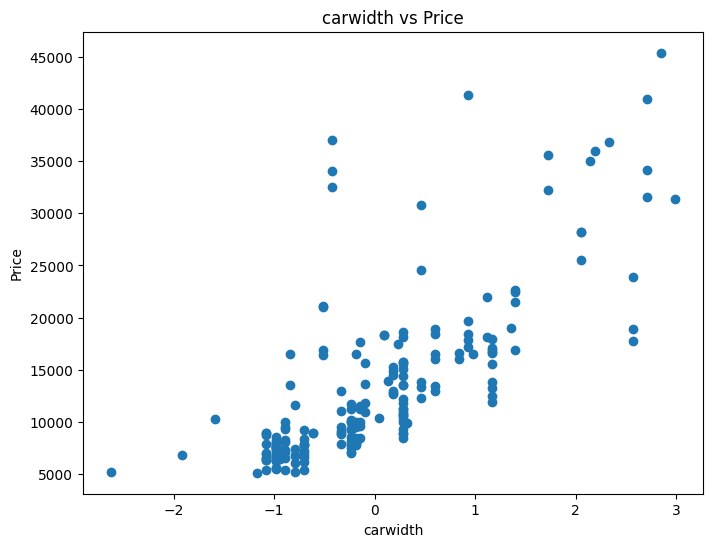

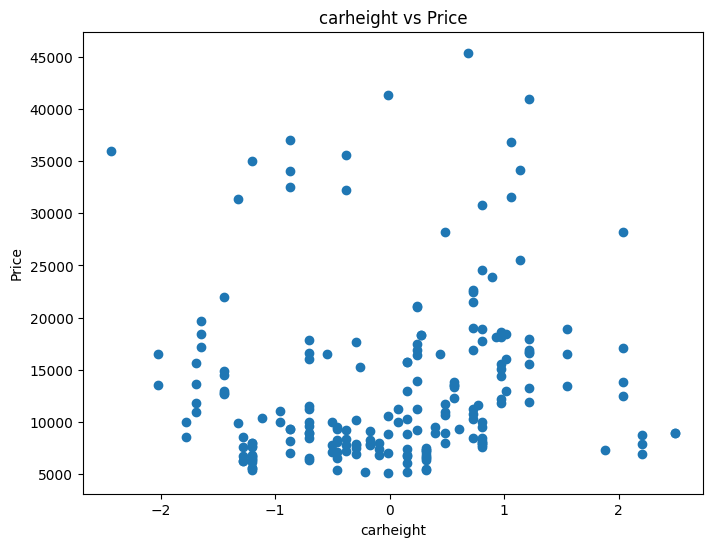

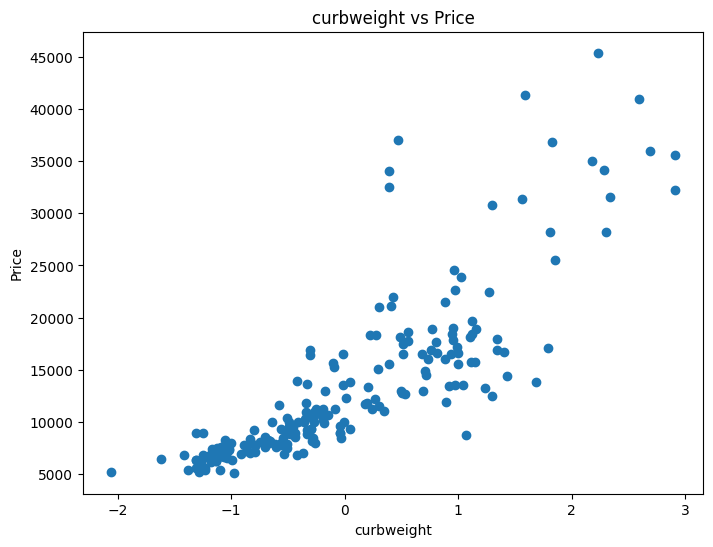

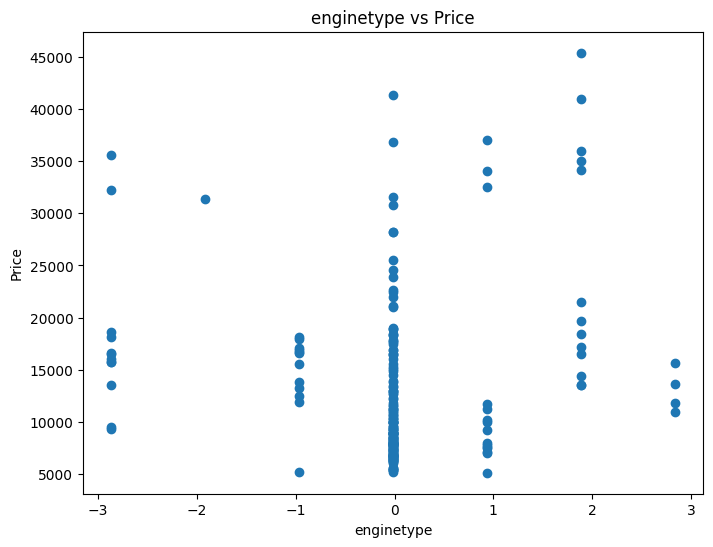

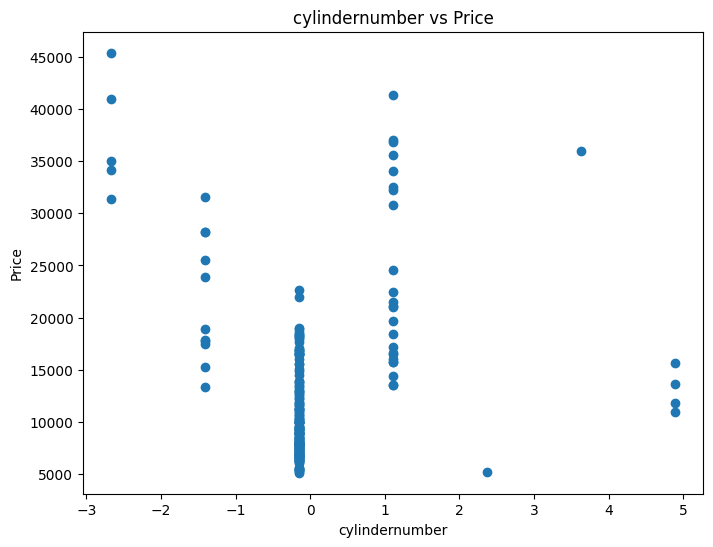

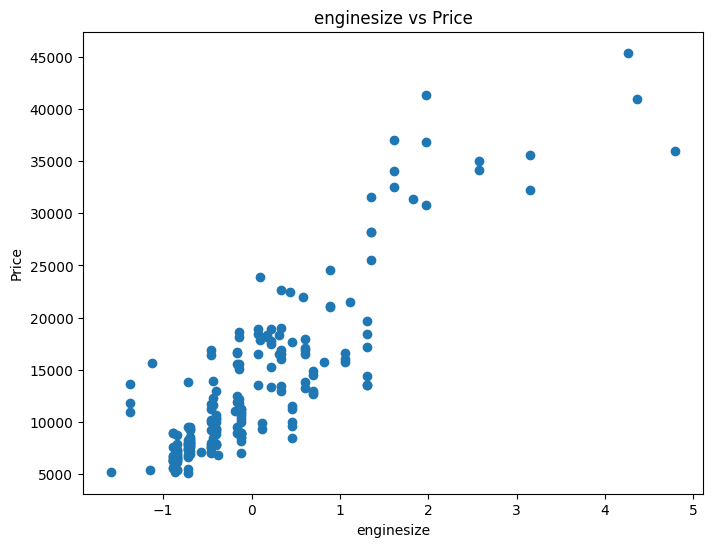

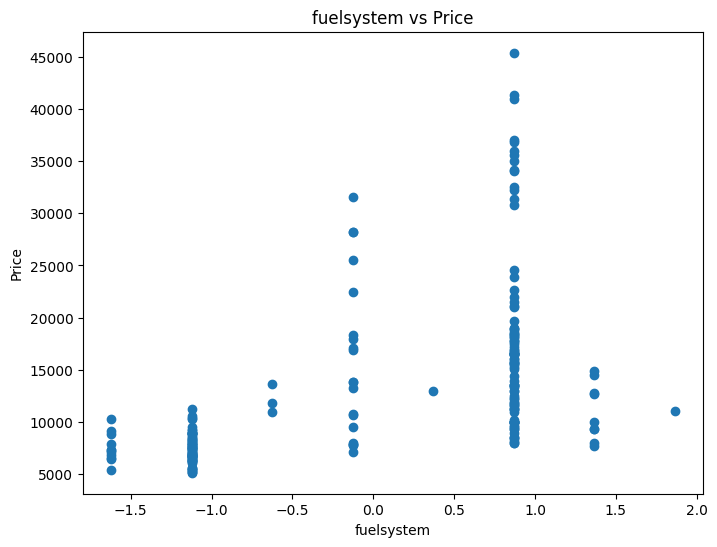

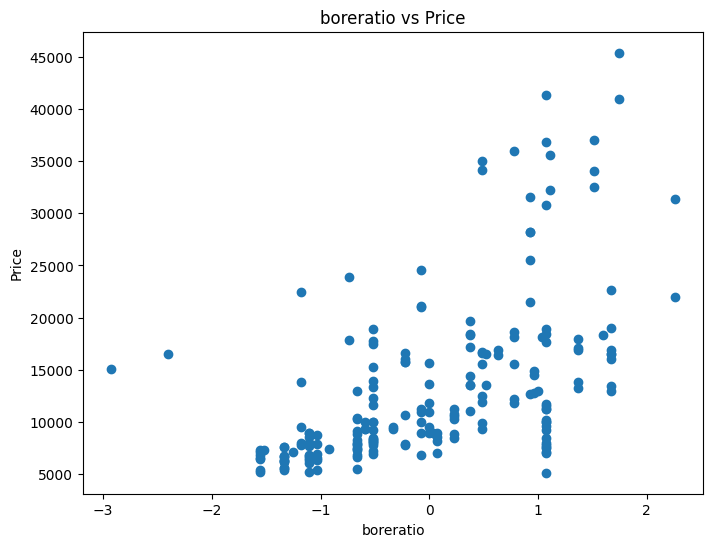

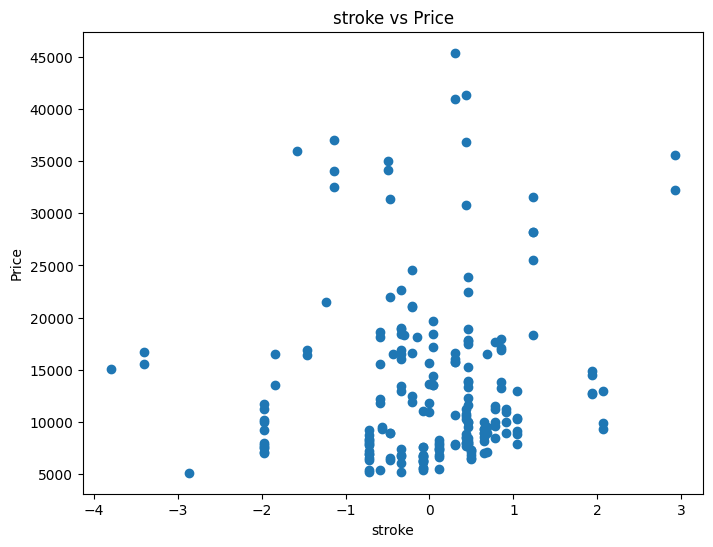

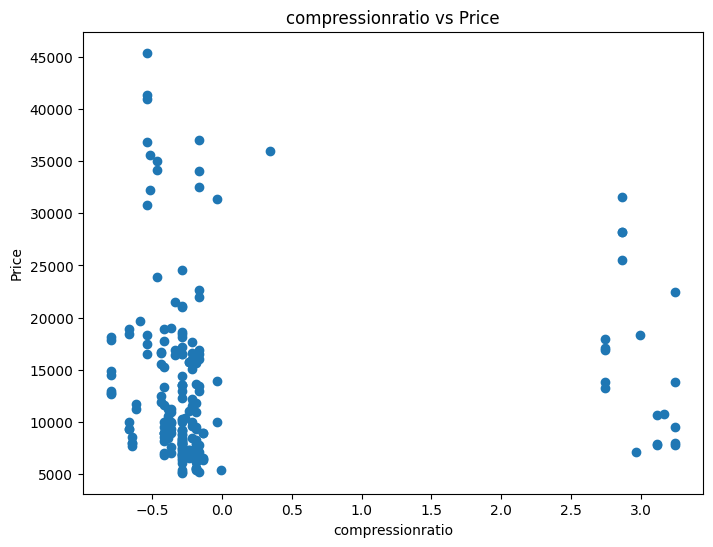

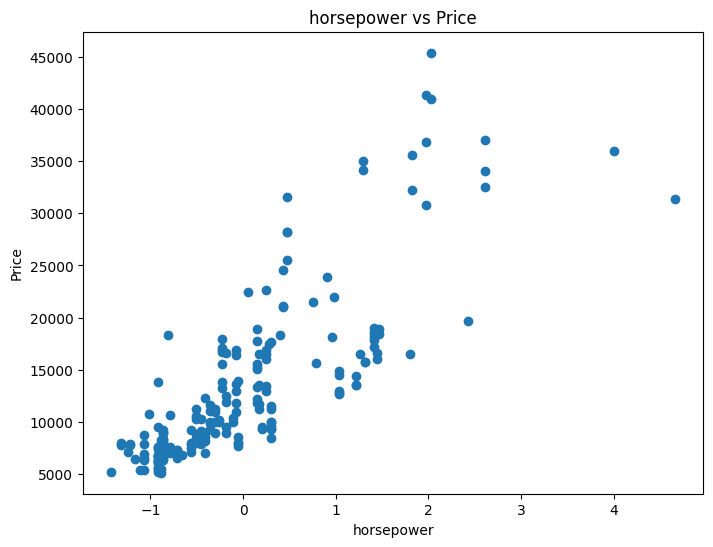

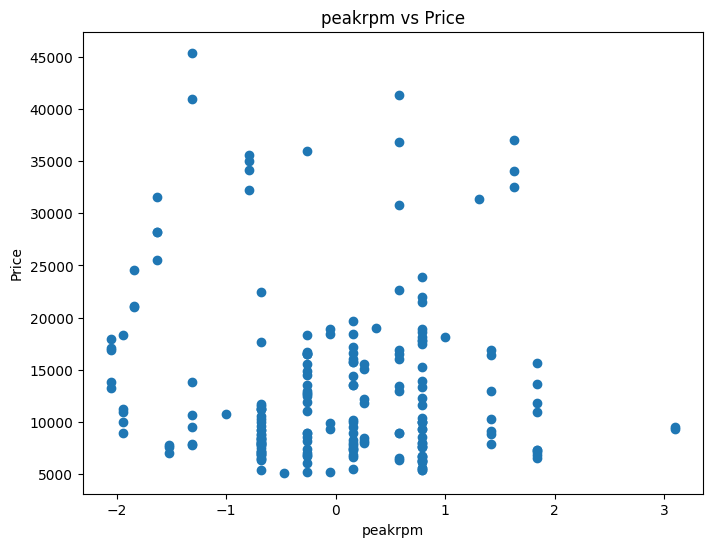

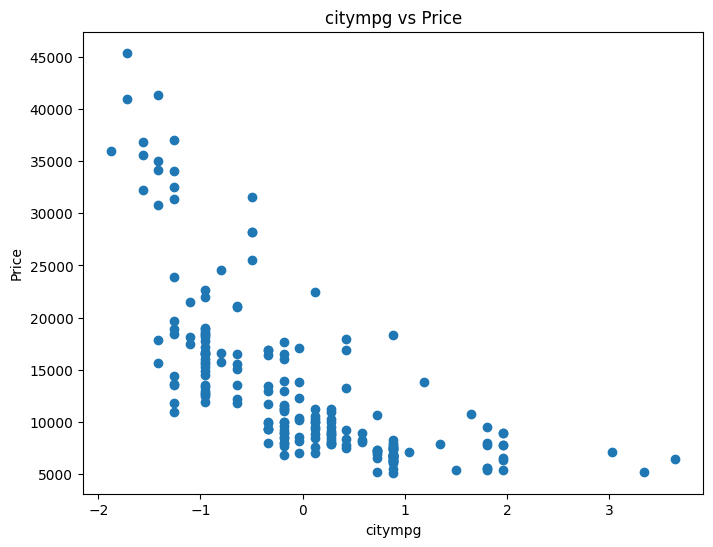

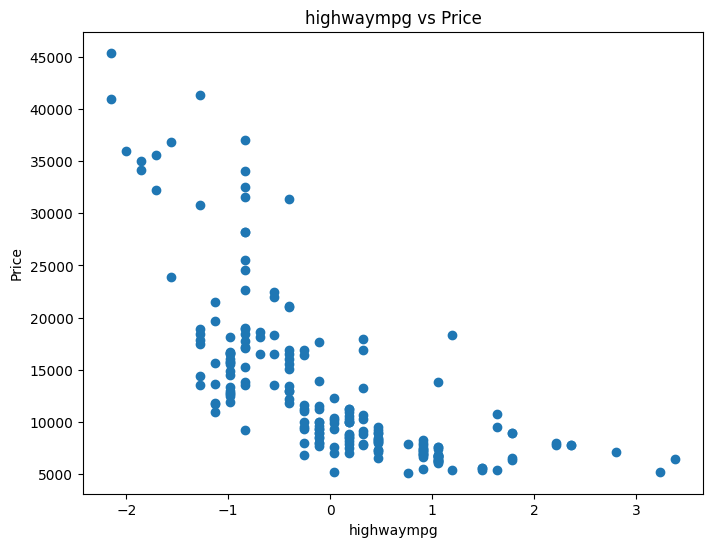

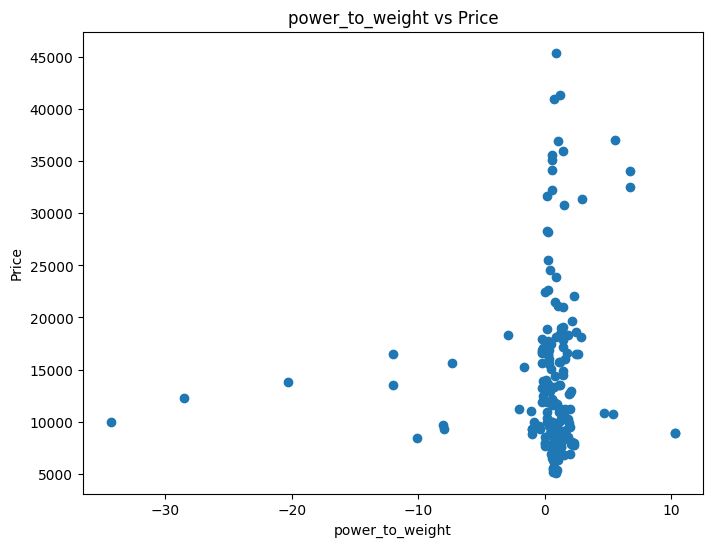

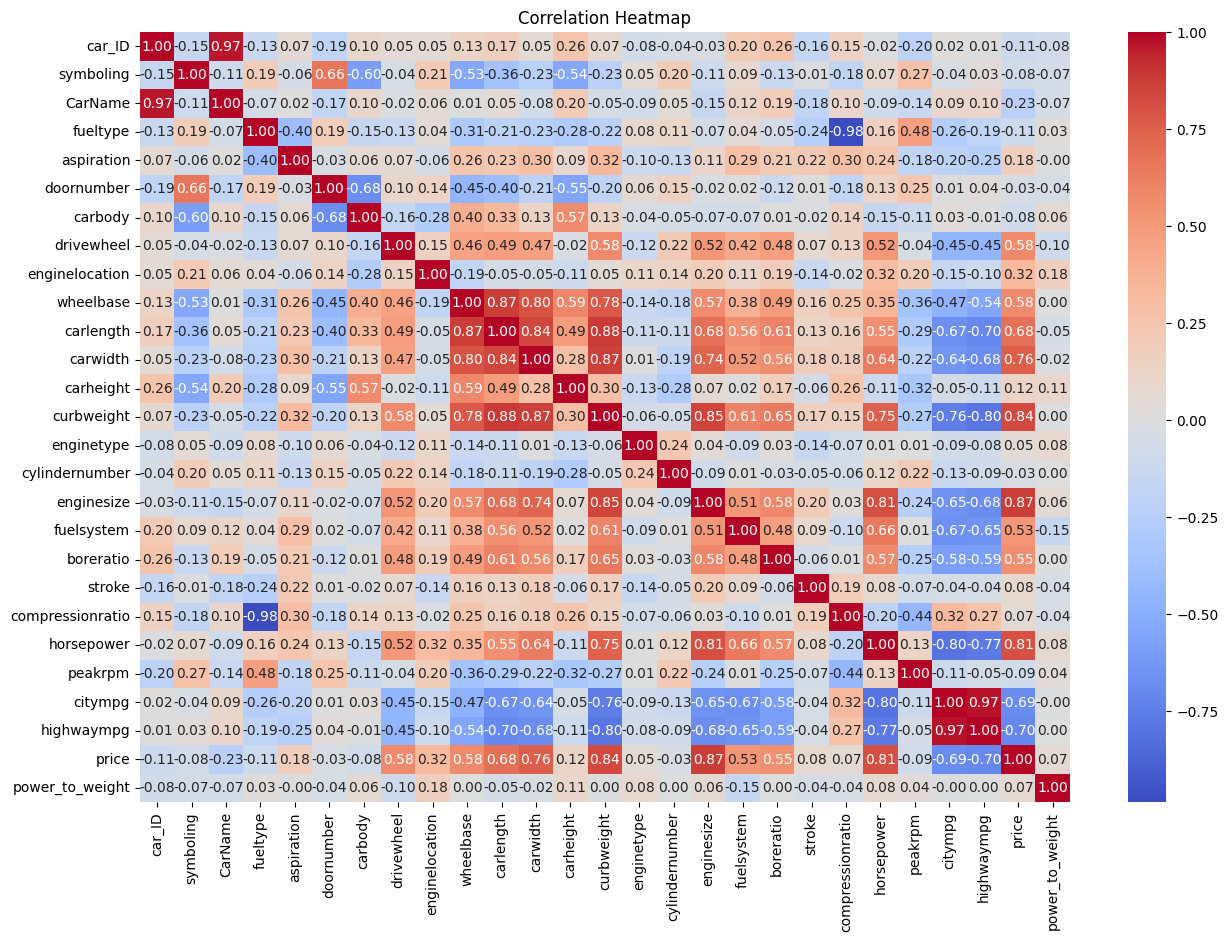

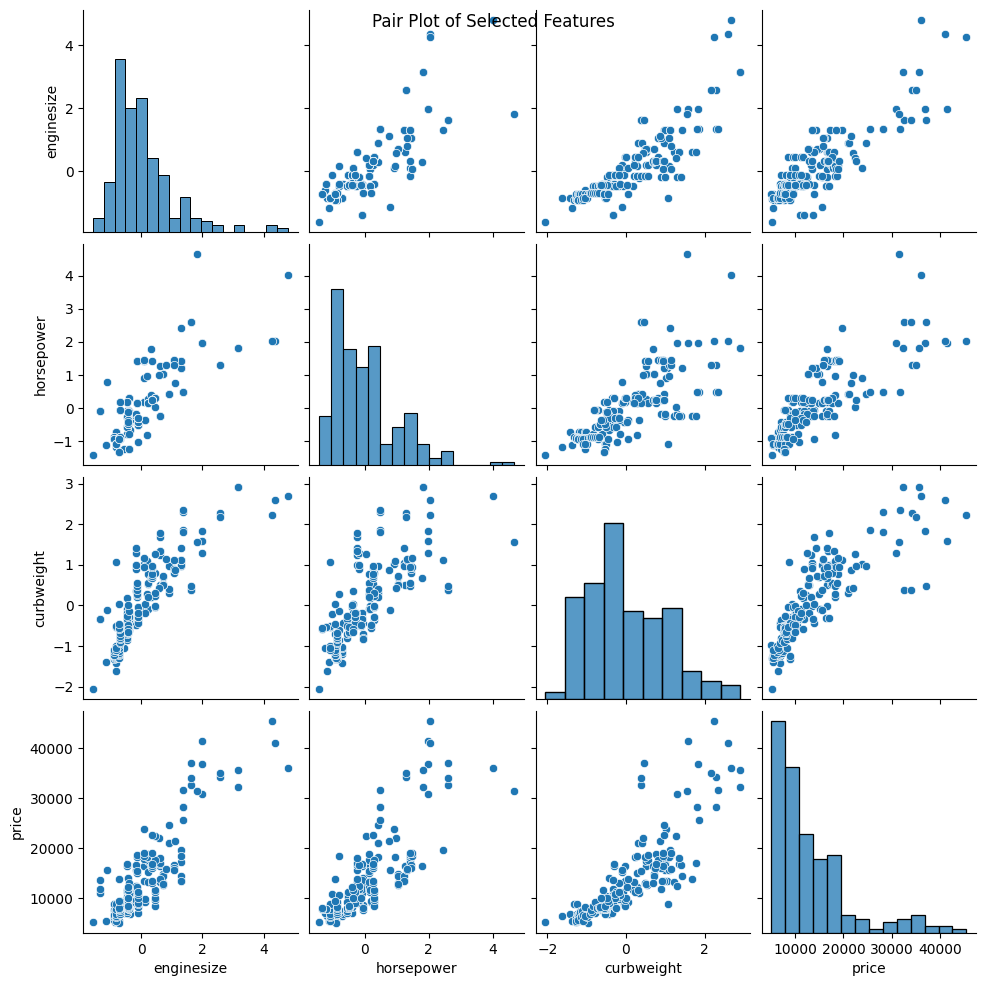

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

# Histograms for numerical features
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots to detect outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Scatter plots to explore relationships with price
for col in numerical_columns:
    if col != 'price':
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df['price'])
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(f'{col} vs Price')
        plt.show()

# Correlation heatmap
plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for selected features
selected_features = ['enginesize', 'horsepower', 'curbweight', 'price']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Selected Features')
plt.show()



Transformed Dataset Head:
      car_ID  symboling   CarName  fueltype  aspiration  doornumber   carbody  \
0 -1.723622   1.743470 -1.838221  0.328798   -0.469295    1.130388 -3.050975   
1 -1.706724   1.743470 -1.813780  0.328798   -0.469295    1.130388 -3.050975   
2 -1.689826   0.133509 -1.862662  0.328798   -0.469295    1.130388 -0.717207   
3 -1.672928   0.938490 -1.789339  0.328798   -0.469295   -0.884652  0.449677   
4 -1.656029   0.938490 -1.764897  0.328798   -0.469295   -0.884652  0.449677   

   drivewheel  enginelocation  wheelbase  ...  fuelsystem  boreratio  \
0    1.213330       -0.121867  -1.690772  ...    0.869568   0.519071   
1    1.213330       -0.121867  -1.690772  ...    0.869568   0.519071   
2    1.213330       -0.121867  -0.708596  ...    0.869568  -2.404880   
3   -0.589081       -0.121867   0.173698  ...    0.869568  -0.517266   
4   -2.391492       -0.121867   0.107110  ...    0.869568  -0.517266   

     stroke  compressionratio  horsepower   peakrpm   city

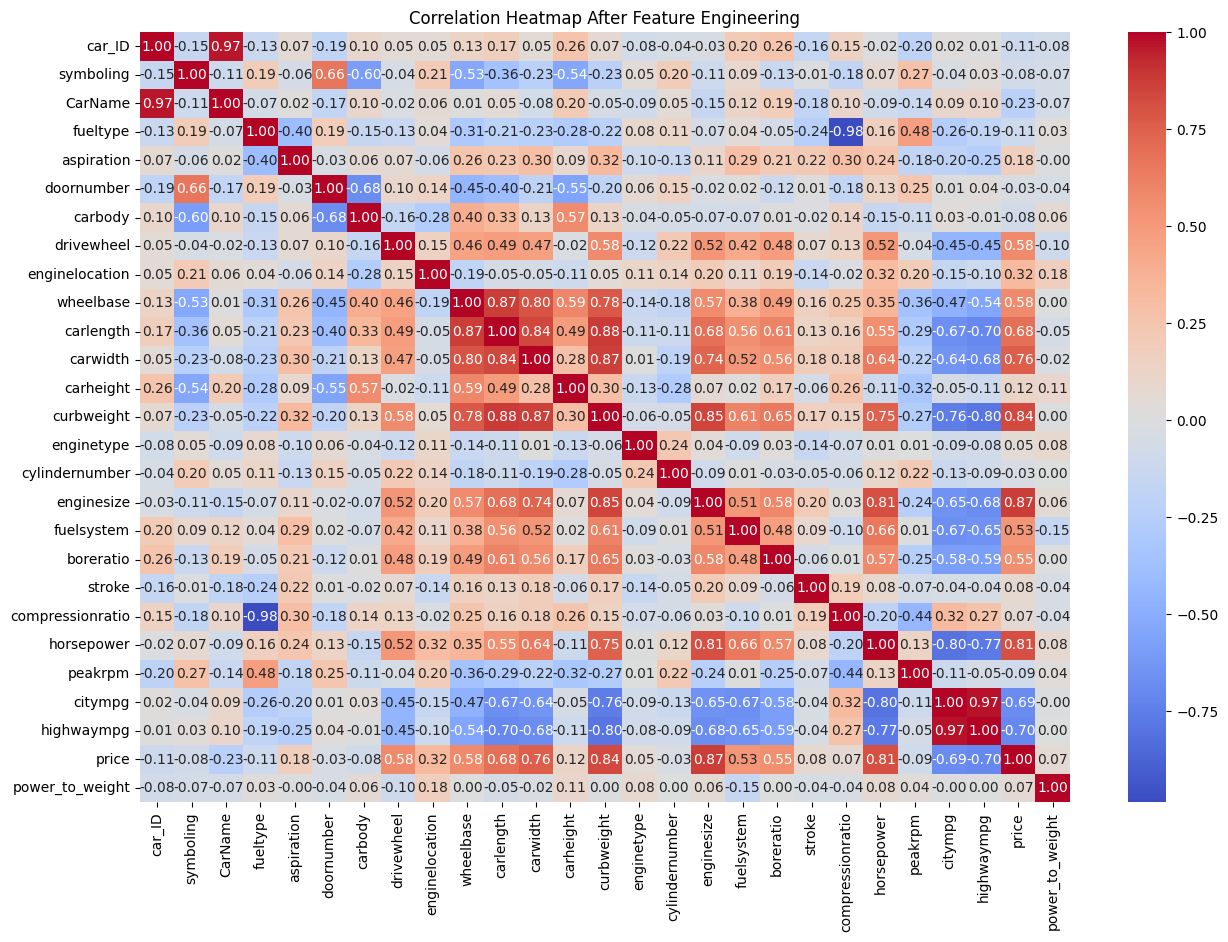

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Feature Engineering

# Handle missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Create new feature: power-to-weight ratio
df['power_to_weight'] = df['horsepower'] / df['curbweight']

# Verify new features and transformed data
print("\nTransformed Dataset Head:\n", df.head())
print("\nUpdated Data Types:\n", df.dtypes)

# Correlation heatmap after feature engineering
plt.figure(figsize=(15, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap After Feature Engineering')
plt.show()


In [56]:
# Model Building

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Ridge Regression with hyperparameter tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = GridSearchCV(Ridge(), ridge_params, cv=5)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Lasso Regression with hyperparameter tuning
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_model = GridSearchCV(Lasso(), lasso_params, cv=5)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Model Evaluation
models = {
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso
}

for model_name, y_pred in models.items():
    print(f"\n{model_name} Results:")
    print(f"R² Score: {r2_score(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.266e+06, tolerance: 8.247e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.619e+07, tolerance: 7.461e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.114e+07, tolerance: 6.692e


Linear Regression Results:
R² Score: 0.8444405103193265
MAE: 2078.8896025436743
RMSE: 3504.353235816843

Ridge Regression Results:
R² Score: 0.8477239052954544
MAE: 2184.251149579213
RMSE: 3467.1727963613785

Lasso Regression Results:
R² Score: 0.8564903340129897
MAE: 2145.9341768453855
RMSE: 3365.892165252957


In [57]:
# Model Comparison
comparison_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge), r2_score(y_test, y_pred_lasso)],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_lasso)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_ridge)), np.sqrt(mean_squared_error(y_test, y_pred_lasso))]
})
print("\nModel Comparison:\n", comparison_results)

# Overfitting/Underfitting Analysis
print("\nModel Overfitting/Underfitting Analysis:")
if r2_score(y_train, lr_model.predict(X_train)) > r2_score(y_test, y_pred_lr):
    print("Linear Regression may be overfitting.")
if r2_score(y_train, ridge_model.predict(X_train)) > r2_score(y_test, y_pred_ridge):
    print("Ridge Regression may be overfitting.")
if r2_score(y_train, lasso_model.predict(X_train)) > r2_score(y_test, y_pred_lasso):
    print("Lasso Regression may be overfitting.")

# Thesis Explanation
print("\nThesis Explanation:")
print("Models with higher R² and lower MAE/RMSE are better. However, regularization in Ridge and Lasso reduces overfitting by penalizing large coefficients.")
print("Linear Regression may overfit if too many insignificant features are included. Lasso helps in feature selection by zeroing out irrelevant features.")



Model Comparison:
                Model  R² Score          MAE         RMSE
0  Linear Regression  0.844441  2078.889603  3504.353236
1   Ridge Regression  0.847724  2184.251150  3467.172796
2   Lasso Regression  0.856490  2145.934177  3365.892165

Model Overfitting/Underfitting Analysis:
Linear Regression may be overfitting.
Ridge Regression may be overfitting.
Lasso Regression may be overfitting.

Thesis Explanation:
Models with higher R² and lower MAE/RMSE are better. However, regularization in Ridge and Lasso reduces overfitting by penalizing large coefficients.
Linear Regression may overfit if too many insignificant features are included. Lasso helps in feature selection by zeroing out irrelevant features.
